In [1]:
# Imports 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read in data for 10plex 
df =  pd.read_csv('NSAF_quant_missed_cleaved_peptides_excluded.csv')
df.head()

,Sequence,Detectability,SMT,NSMT,NSAF,NSMT_over_SC,Protein
0,AAAAAAAATMALAAPSSPTPESPTMLTK,1,56437.600,0.000005,0.000018,0.000053,INCENP
1,AAAAAAAGDSDSWDADAFSVEDPVR,1,2270292.510,0.000686,0.000541,0.000258,EIF3J
2,AAAAAAALQAK,1,1979939.150,0.000362,0.000209,0.000352,RPL4
3,AAAAAAGAASGLPGPVAQGLK,1,3547224.919,0.000266,0.000295,0.000183,IPO9
4,AAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGAR,1,874337.160,0.000112,0.000110,0.000207,CARM1


In [3]:
# Read in data for 6plex 
plasma = pd.read_csv('PLASMA_quant_missed_cleaved_peptides_excluded.csv')

In [4]:
df['TMT'] = 10 # asign the type of data to the column e.g 10 is for 10plex 
plasma['TMT'] = 6

In [5]:
df['length'] = df['Sequence'].str.len() # get the length of the peptids
plasma['length'] = plasma['Sequence'].str.len()

In [6]:
x = pd.concat([df, plasma], axis=0) # combine the two dataframes 

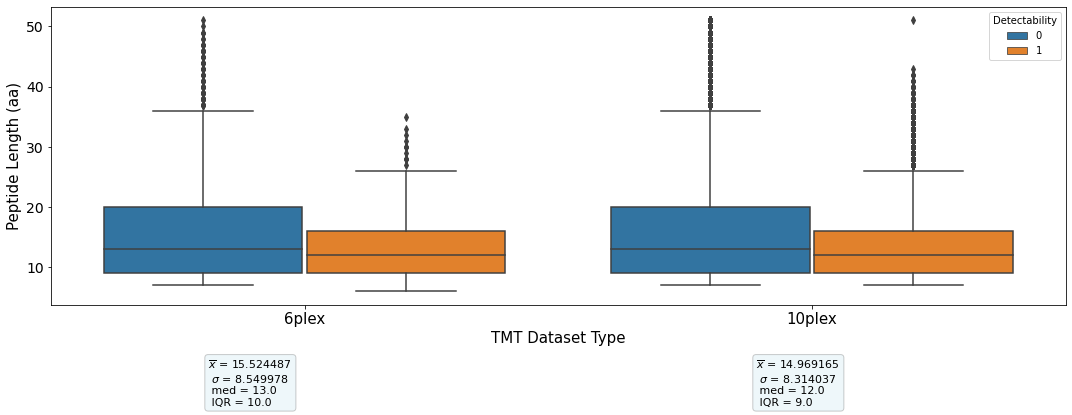

In [7]:
# plot a boxplot to show the distribution of the length of the peptides using seaborn 
plt.figure(figsize=(15,6))
sns.boxplot(x="TMT", y="length", hue="Detectability",
            data=x)

xvalues = ["6plex", "10plex"]
plt.xticks(np.arange(2), xvalues, fontsize=15)
plt.yticks(fontsize=14)
plt.xlabel("TMT Dataset Type", fontsize=15)
plt.ylabel("Peptide Length (aa)", fontsize=15)

iqr = round(x['length'][x['TMT'] == 6 ].quantile(0.75) - x['length'][x['TMT'] == 6].quantile(0.25), 6)
median = round(x['length'][x['TMT'] == 6 ].median(), 6)
mean = round(x['length'][x['TMT'] == 6 ].mean(),6) 
sd = round(x['length'][x['TMT'] == 6 ].std(),6)
textstr = "$\overline {x}$" + f" = {mean} \n $\sigma$ = {sd} \n med = {median} \n IQR = {iqr}"
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.2)
plt.text(-0.19, -13, textstr, fontsize=11, bbox=props) 

iqr = round(x['length'][x['TMT'] == 10].quantile(0.75) - x['length'][x['TMT'] == 6].quantile(0.25), 6)
median = round(x['length'][x['TMT'] == 10 ].median(), 6)
mean = round(x['length'][x['TMT'] == 10 ].mean(),6) 
sd = round(x['length'][x['TMT'] == 10 ].std(),6)
textstr = "$\overline {x}$" + f" = {mean} \n $\sigma$ = {sd} \n med = {median} \n IQR = {iqr}"
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.2)
plt.text(0.89, -13, textstr, fontsize=11, bbox=props) 

plt.tight_layout()
plt.savefig('length_boxplot.png', dpi = 600)

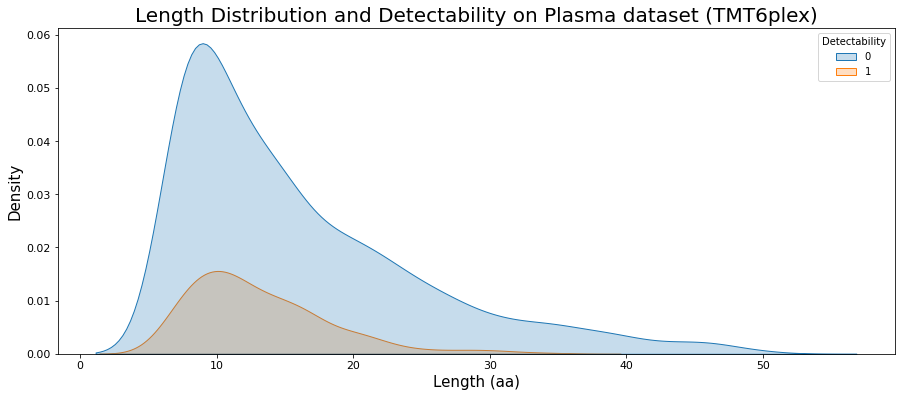

In [8]:
# plotting a kde plot to show the distribution of the length of the peptides using seaborn
plt.figure(figsize=(15,6))
sns.kdeplot(x='length',  data=plasma, hue='Detectability', fill=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Length (aa)', fontsize=15)

plt.ylabel('Density', fontsize=15)
plt.title('Length Distribution and Detectability on Plasma dataset (TMT6plex)', fontsize=20)
plt.savefig('length_distribution_detectability.png', dpi=600)

In [9]:
length_freq = df['length'].value_counts()
length = length_freq.to_frame().reset_index()
length.rename(columns={'index':'length', 'length':'frequency'}, inplace=True)

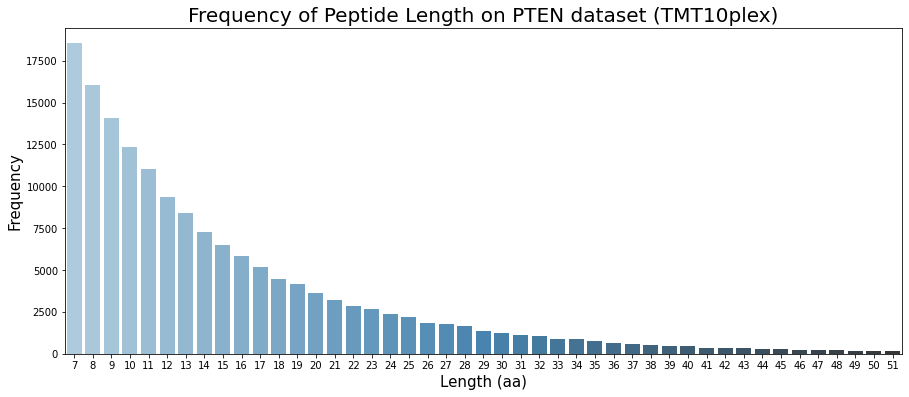

In [10]:
plt.figure(figsize=(15,6))

sns.barplot(x='length', y='frequency', data=length, palette='Blues_d')
plt.xlabel('Length (aa)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Peptide Length on PTEN dataset (TMT10plex)', fontsize=20)
plt.savefig('length_frequency.png', dpi=600, bbox_inches='tight')